In [18]:
from Define_Model.FilterLayer import FreqTimeReweightLayer, get_weight
import torch
import kaldiio
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ftl = FreqTimeReweightLayer()
# x = torch.randn(2, 1, 300, 161)
sample = kaldiio.load_mat('/home/yangwenhao/local/project/lstm_speaker_verification/data/vox2/klsp/spect/dev/raw_spect_dev.1.ark:26')
chunk_sample = sample[300:]
x = torch.tensor(chunk_sample).unsqueeze(0).unsqueeze(0)
x -= x.mean(dim=-2, keepdim=True)

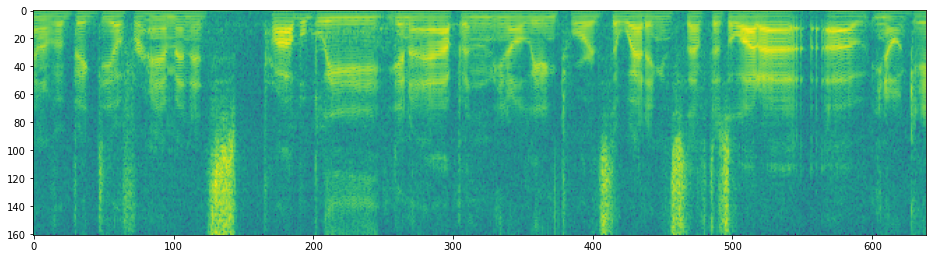

In [3]:
plt.figure(figsize=(16, 6))

plt.imshow(chunk_sample.T)

In [22]:
weight = torch.randn(1,1,1,161)
sig = torch.nn.Sigmoid()
soft = torch.nn.Softmax(dim=-1)

In [35]:
y1 = x + x * sig(weight)
y2 = x + x * sig(y1.sum(dim=-2, keepdim=True))
y3 = x + x * soft(weight) * 161

In [25]:
soft(weight) * 161

tensor([[[[ 0.3472,  0.2050,  0.2140,  0.3434,  0.1006,  1.1411,  0.0897,
            1.7767,  0.4096,  0.5141,  0.2643,  0.8491,  1.2198,  0.7873,
            0.4760,  6.9560,  0.1743,  0.4597,  0.2425,  0.2912,  0.0895,
            0.4568,  0.0588,  0.3272,  0.1630,  1.0939,  0.0950,  0.8973,
            0.2793,  1.3310,  0.6054,  1.0610,  1.3473,  0.1339,  0.9544,
            0.5057,  0.1107,  1.9488,  3.9610,  0.6271,  0.1803,  1.0754,
            0.1863,  2.8179,  0.4937,  0.5073,  0.6324,  0.6391,  1.0809,
            1.6634,  3.0832,  0.5644,  0.2171,  0.4162,  0.3141,  0.3629,
            0.3202,  0.3069,  3.6926,  2.1537,  1.9575,  0.3496,  0.5136,
            0.4220,  1.3554,  2.2867,  0.6356,  0.4639,  0.6888,  0.7793,
            0.6487,  0.8008,  0.5887,  1.8751,  0.7673,  0.0842,  0.2298,
            0.9951,  0.2801,  2.3368,  0.9977,  0.3101,  1.4287,  2.4989,
            2.0294,  0.5995,  0.8152,  0.4466,  0.4853, 14.7525,  1.8669,
            0.1237,  1.2757,  0.3158, 

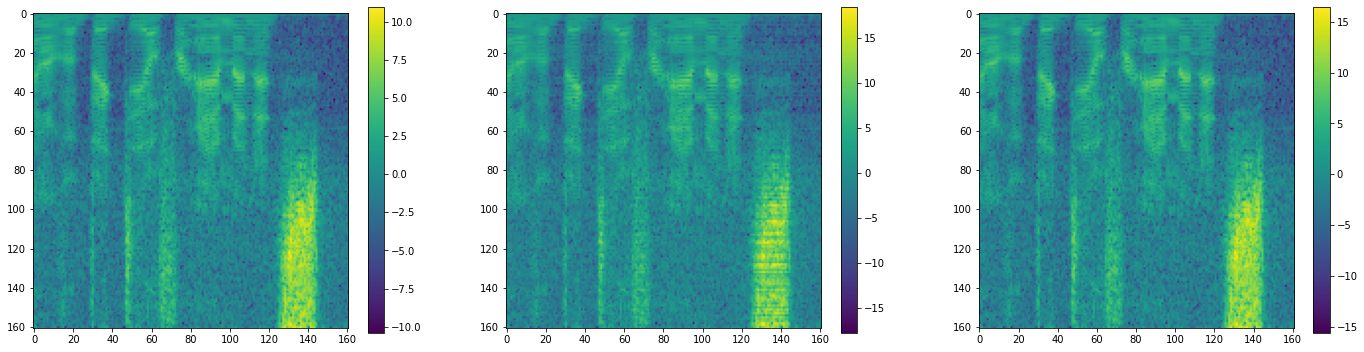

In [36]:
y = ftl(x)
len_img = 3

plt.figure(figsize=(24, 6))
plt.subplot(1,len_img,1)
plt.imshow(x.squeeze().detach().numpy().T[:,:161])
plt.colorbar()

plt.subplot(1,len_img,2)
plt.imshow(y1.squeeze().detach().numpy().T[:,:161])
plt.colorbar()

plt.subplot(1,len_img,3)
plt.imshow(y2.squeeze().detach().numpy().T[:,:161])
plt.colorbar()

# plt.subplot(1,4,4)
# plt.imshow(y3.squeeze().detach().numpy().T[:,:161])
# plt.colorbar()

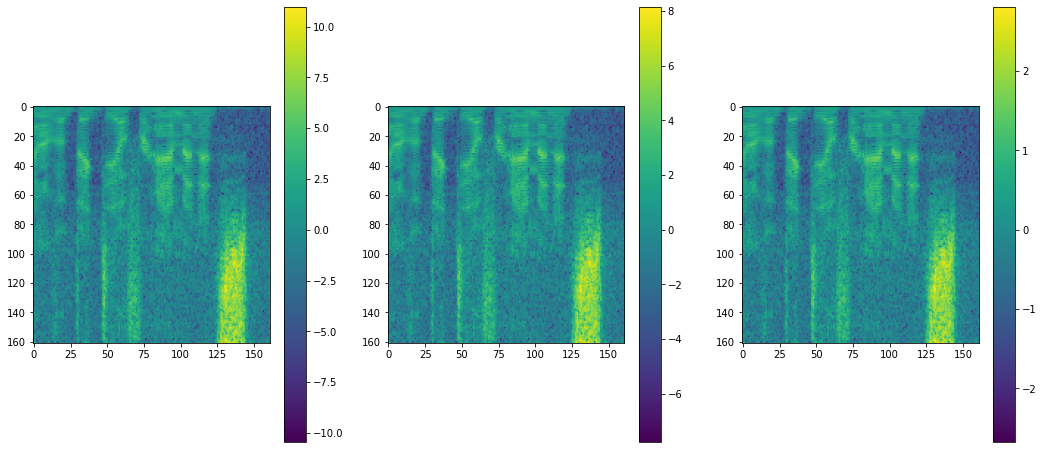

In [9]:
y = ftl(x)

plt.figure(figsize=(18, 8))
plt.subplot(1,3,1)
plt.imshow(x.squeeze().detach().numpy().T[:,:161])
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(y.squeeze().detach().numpy().T[:,:161])
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow((x-y).squeeze().detach().numpy().T[:,:161])
plt.colorbar()

In [5]:
mel = get_weight(weight='mel', input_dim=161, power_weight='')

In [6]:
ftl.weight.data *= torch.tensor((mel-mel.mean())*10).reshape(1,1,1,-1)

In [41]:
ftl.weight.data

tensor([[[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1.]]]])

In [26]:
mel.shape

(161,)

In [ ]:
x - y 